#  Infectious disease in a city: Bayes

In [55]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Contents
{:.no_toc}
* 
{: toc}

## Formulation of the problem

Suppose $\theta$ is the fraction of infected individual in a small city. 
A small sample of $n=20$ individual from the city are checked and 
the total number of people infected is $k=4$. 

The MLE estimate of $\theta$ is simply 4./20 since we have only  one city to estimate from.

**Question: What is the fraction of infected individuals?**

For each individual the probability of being infected is $\theta$ so the total 
number of infected people given a sample of 20 is given 
by a binomial. 

$$\Lik = p(n,k|\theta) = Binom(n,k, \theta)=\frac{n!}{k! (n-k)! } \, \theta^k \, (1-\theta)^{(n-k)} $$

Now, studies from other cities shows that $\theta$ varies from 0.05 to 0.20 with an average value  of 0.10. 

**This is our prior information**

We can choose any prior that encapsulates 
this information. For reasons of conjugacy we 
choose as prior the beta distribution.

## Choosing a prior and posterior

The  mean of $Beta(\alpha, \beta)$ is  $\mu = \frac{\alpha}{\alpha+\beta}$ while the variance is 

$$V=\mu (1- \mu)/(\alpha + \beta + 1)$$

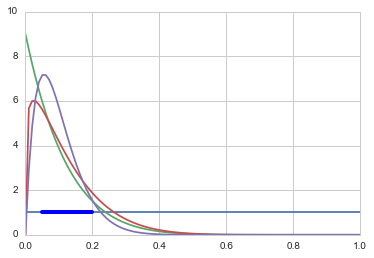

In [56]:
from scipy.stats import beta
x=np.linspace(0., 1., 100)
plt.plot(x, beta.pdf(x, 1, 1));
plt.plot(x, beta.pdf(x, 1, 9));
plt.plot(x, beta.pdf(x, 1.2, 9));
plt.plot(x, beta.pdf(x, 2, 18));
plt.axhline(1, 0.05, 0.2, 'r', lw=4)

and choose $\alpha=1.2$ and $\beta=9$
such as the mean of the prior is 0.10 and the range to be consistent with
what we know from other cities.

$$ p(\theta) = {\rm Beta}(\theta,\alpha, \beta) = \frac{\theta^{\alpha-1} (1-x)^{\beta-1} }{B(\alpha, \beta)} $$
where $B(\alpha, \beta)$ is independent of $\theta$ and it is the normalization factor.

From Bayes theorem, the posterior for $\theta$ is 

$$ p(\theta|D) \propto  p(\theta) \, p(n,k|\theta)  =  Binom(n,k, \theta) \,  {\rm Beta}(\theta,\alpha, \beta)  $$

which can be shown to be 

$${\rm Beta}(\theta, \alpha+k, \beta+n-k) =  {\rm Beta}(\theta, 4.2, 26) $$

## Interrogating the posterior

Sometimes we may want to summarize other aspects of a posterior distribution. For example 
we may want to compare two or more populations. In that case we may be interested in the posterior 
distribution of $\theta_1 - \theta_2$, $\theta_1/\theta_2$ or $\max\{\theta_1,\ldots, \theta_m\}$. If we can 
generate random samples from these distributions, then all of these posterior quantities can be 
approximated to an arbitrary degree of precision using MC and MCMC methods. 

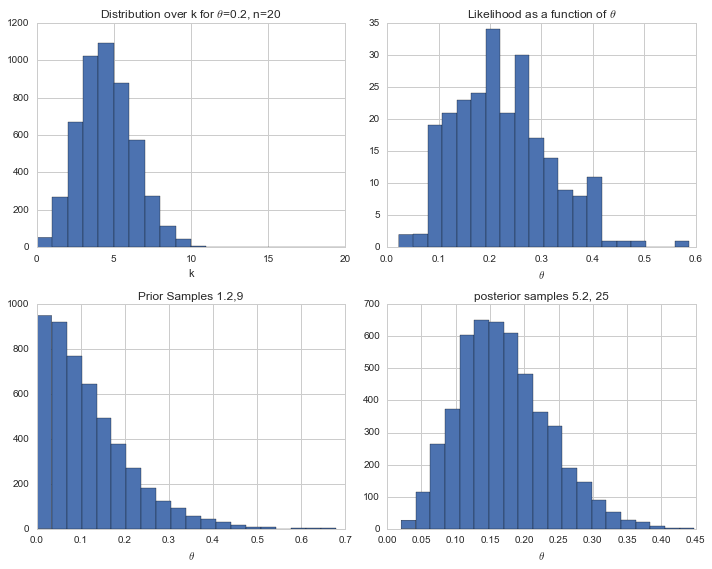

In [57]:
plt.figure(figsize=[10,8])
## INITIALIZING
n = 20 # number of data
N =5000 # samples
k=4  # binomial k

## THE LIKELIHOOD:BINOMIAL 
theta=k/n

liks  = np.random.binomial( n, theta, N);

plt.subplot(2,2,1)
plt.hist(liks, bins=np.arange(21))
plt.title("(Sampling) Distribution over k for $\\theta$={}, n={}".format(theta, n))

plt.xlabel('k')

# I need samples of theta (not of k)
lik_theta = lambda theta: theta**k * (1-theta)**(n-k)
#use rejection to get this distribution 
X=np.random.uniform(low=0, high=1, size=N)
Y=np.random.uniform(low=0, high=0.000213, size=N)
Yt = lik_theta(X) 

Xa = X[Y<Yt]
plt.subplot(2,2,2)
plt.hist(Xa, 20)
plt.xlabel('$\\theta$')
plt.title('Likelihood as a function of $\\theta$')

## PRIOR
alpha=1.2
beta=9
prs = np.random.beta(alpha, beta, N);

plt.subplot(2,2,3)
plt.hist(prs, 20)
plt.title('Prior Samples {},{}'.format(alpha, beta))
plt.xlabel('$\\theta$')
## POSTERIOR EXACT

posts = np.random.beta(alpha+k, beta+n-k, N);
plt.subplot(2,2,4) 
plt.hist(posts, 20)
plt.title('posterior samples {}, {}'.format(alpha+k, beta+n-k))
plt.xlabel('$\\theta$');
plt.tight_layout()

In [58]:
posts

array([ 0.26117774,  0.16012419,  0.08578405, ...,  0.18687113,
        0.16526767,  0.17742319])

## Obtaining the posterior predictive

The posterior predictive:

$$p(y^{*} \vert D) = \int d\theta p(y^{*} \vert \theta) p(\theta \vert D)$$

seems to be a complex integral. But really from the perspective of sampling, all we have to do is to first draw the thetas from the posterior, then draw y's from the likelihood, and histogram the likelihood. This is the same logic as marginal posteriors, with the addition of the fact that we must draw  y from the likelihood once we drew $\theta$. You might think that we have to draw multiple $y$s at a theta, but this is already taken care of for us because of the nature of sampling. We already have multiple $\theta$a in a bin.

In [59]:
postpred = np.random.binomial( n, posts);

In [60]:
posts.shape, postpred.shape

((5000,), (5000,))

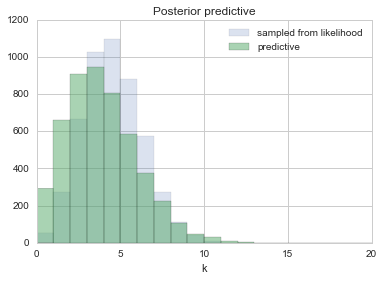

In [61]:
plt.hist(liks, bins=np.arange(21), alpha=0.2, label="sampled from likelihood")
plt.hist(postpred, bins=np.arange(21), alpha=0.5, label="predictive")
plt.title('Posterior predictive')
plt.xlabel('k')
plt.legend()